#Installing required libraries


In [145]:
!pip install kora -q

In [146]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importing libraries


In [147]:
import selenium
from kora.selenium import wd as browser
from selenium.webdriver.common.by import By
import pandas as pd 
import time
from datetime import date,datetime as dt
import datetime
from bs4 import BeautifulSoup
import numpy as np
import re 

# Amazon

In [148]:
dataset_amazon=[]

In [149]:
url = "https://www.amazon.in/Google-Pixel-128-Smartphone-Black/product-reviews/B09HJZPFDD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [150]:
browser.get(url)

In [151]:
for i in range(1,60):

  containers=[x.get_attribute('innerHTML') for x in browser.find_elements(By.XPATH,'//div[@class="a-section celwidget"]')]
  for container in containers:
    rev1=dict()
    bsObj=BeautifulSoup(container)
    #review 
    rev=bsObj.find('a',attrs={"class":"a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold"}).text.strip()
    #rating
    try:
      rating=bsObj.find('a',attrs={"class":"a-link-normal"})["title"]
      rating=int(float(rating[0]))
    except:
      rating=np.NaN
    

      

    rev1["rating"]=rating
    rev1["review"]=rev
    dataset_amazon.append(rev1)


In [152]:
df_amazon=pd.DataFrame(dataset_amazon)

In [153]:
df_amazon.head(25)

,rating,review
0,4,Good camera+ video phone at its pricepoint
1,4,Fingerprint print issues :(
2,4,Good allrounder phone
3,4,The Best
4,4,Review after a month of use
5,4,Satisfied
6,2,Lover of Google but dissatisfied
7,5,Be patient until the Software Updates Install!...
8,4,Haptic's is everything
9,3,Dull display


In [154]:
amazon = 'Amazon_Googel_Pixel_6a_20220930.xlsx'

In [155]:
df_amazon.to_excel(amazon)

# Flipkart

In [156]:
dataset_flipkart=[]

In [157]:
url = "https://www.flipkart.com/google-pixel-6a-charcoal-128-gb/product-reviews/itme5ae89135d44e?pid=MOBGFKX5YUXD74Z3&lid=LSTMOBGFKX5YUXD74Z3MXA2OB&marketplace=FLIPKART"

In [158]:
browser.get(url)

In [159]:
reviews = []
ratings = []

for i in range(1,70):
  containers=[x.get_attribute('innerHTML') for x in browser.find_elements(By.XPATH,'//div[@class="_1AtVbE col-12-12"]')]


  for container in containers:
    rev1=dict()
    bsObj=BeautifulSoup(container)

    #review 
    rev=bsObj.find('div',attrs={"class":"t-ZTKy"})
    #rating   
    try:
      rating = bsObj.find('div',attrs = {'class':'_3LWZlK _1BLPMq'}).text
      rating = re.sub("\\n","",r)
      rating = re.sub("/5","",r)
      ratings.append(float(rating))
    except:
      ratings.append(np.nan)
    
    rev1["rating"]=rating
    rev1["review"]=rev
    
    dataset_flipkart.append(rev1)

In [160]:
df_flipkart=pd.DataFrame(dataset_flipkart)

In [161]:
df_flipkart

,rating,review
0,3,None
1,3,None
2,3,None
3,3,None
4,5,[[[Pixel phones are what every Camera enthusia...
...,...,...
1030,5,[[[Good phone for daily use. Very smooth ui an...
1031,5,[[[Its my first pixel phone and it was a beat ...
1032,4,[[[Overall it's a great product. AFTER 2 DAYS ...
1033,5,[[[The camera is the best part of this phone l...


In [162]:
flipkart = 'Flipkart_Googel_Pixel_6a_20220930.xlsx'

In [163]:
df_amazon.to_excel(flipkart)

#Wordcloud_countvectorizer

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(24,16)

In [165]:
from wordcloud import WordCloud,STOPWORDS
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter 

In [166]:
amazondf=pd.read_excel("Amazon_Googel_Pixel_6a_20220930.xlsx")

In [167]:
amazondf.head(10)

,Unnamed: 0,rating,review
0,0,4,Good camera+ video phone at its pricepoint
1,1,4,Fingerprint print issues :(
2,2,4,Good allrounder phone
3,3,4,The Best
4,4,4,Review after a month of use
5,5,4,Satisfied
6,6,2,Lover of Google but dissatisfied
7,7,5,Be patient until the Software Updates Install!...
8,8,4,Haptic's is everything
9,9,3,Dull display


In [168]:
amazondf=amazondf.dropna()

In [169]:
amazondf.shape

(590, 3)

In [171]:
flipkartdf=pd.read_excel("Flipkart_Googel_Pixel_6a_20220930.xlsx")

In [172]:
flipkartdf.head()

,Unnamed: 0,rating,review
0,0,4,Good camera+ video phone at its pricepoint
1,1,4,Fingerprint print issues :(
2,2,4,Good allrounder phone
3,3,4,The Best
4,4,4,Review after a month of use


In [173]:
flipkartdf.shape

(590, 3)

##WordCloud


In [174]:
s=list(STOPWORDS)+ ["Flipkart","Google","Pixel","6a","Googel Pixel 6a","Amazon"]

In [175]:
def wordcloud(df):
  only_reviews=" ".join(df["review"])
  wc=WordCloud(width=1200,height=800,max_words=200,stopwords=s,background_color="pink")
  plt.figure(figsize=(12,8))
  plt.imshow(wc.generate_from_text(only_reviews))
  plt.show()

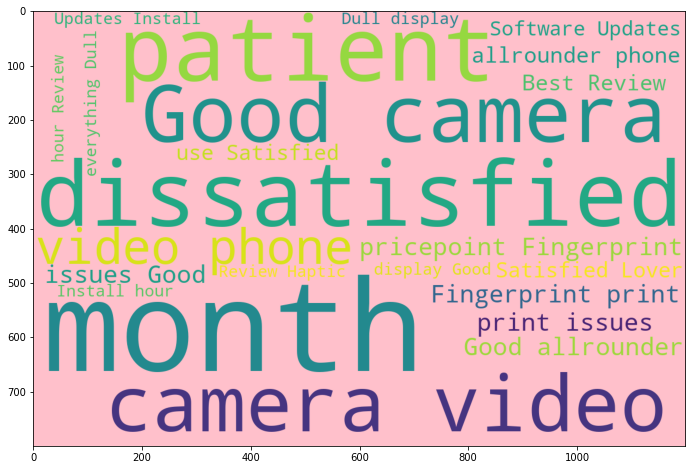

In [176]:
#wordcloud for amazon
wordcloud(amazondf)

Most frequent words are: Good, camera, video phone, satisfied, allrounder,... 

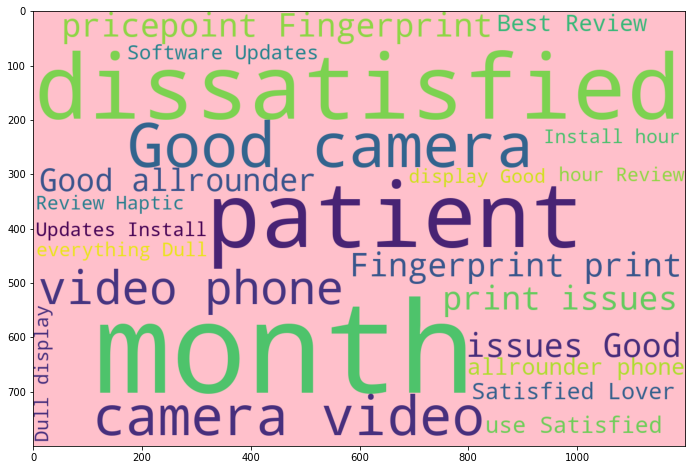

In [177]:
#wordcloud for flipkart
wordcloud(flipkartdf)

Most frequent words are: Good camera, pricepoint, camera video, allrounder, ...

##Count Vectorzer

In [178]:
def wordcounts(df,i):
  tf=CountVectorizer(token_pattern="[a-z']+",max_df=0.6,min_df=10,stop_words=s,ngram_range=(i,i))
  tf_mat=tf.fit_transform(df.review)
  word_freq=tf_mat.sum(axis=0)
  wf=np.array(word_freq)[0]
  vocab=dict()
  vocab_reversed={v:k for k,v in tf.vocabulary_.items()}
  for i in vocab_reversed.keys():
    vocab[vocab_reversed[i]]=wf[i]
  word_dict=dict(sorted(vocab.items(),key=lambda x:x[1],reverse=True))
  print(word_dict)

In [179]:
wordcounts(amazondf,1)

{'good': 118, 'phone': 118, 'review': 118, 'camera': 59, 'video': 59, 'pricepoint': 59, 'fingerprint': 59, 'print': 59, 'issues': 59, 'allrounder': 59, 'best': 59, 'month': 59, 'use': 59, 'satisfied': 59, 'lover': 59, 'google': 59, 'dissatisfied': 59, 'patient': 59, 'software': 59, 'updates': 59, 'install': 59, 'hour': 59, "haptic's": 59, 'everything': 59, 'dull': 59, 'display': 59}


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amazon', 'flipkart', 'googel', 'google', 'pixel'] not in stop_words.
  % sorted(inconsistent)


In [180]:
wordcounts(amazondf,2)

{'good camera': 59, 'camera video': 59, 'video phone': 59, 'phone pricepoint': 59, 'fingerprint print': 59, 'print issues': 59, 'good allrounder': 59, 'allrounder phone': 59, 'review month': 59, 'month use': 59, 'lover google': 59, 'google dissatisfied': 59, 'patient software': 59, 'software updates': 59, 'updates install': 59, 'install hour': 59, 'hour review': 59, "haptic's everything": 59, 'dull display': 59}


In [181]:
wordcounts(amazondf,3)

{'good camera video': 59, 'camera video phone': 59, 'video phone pricepoint': 59, 'fingerprint print issues': 59, 'good allrounder phone': 59, 'review month use': 59, 'lover google dissatisfied': 59, 'patient software updates': 59, 'software updates install': 59, 'updates install hour': 59, 'install hour review': 59}


In [182]:
wordcounts(flipkartdf,1)

{'good': 118, 'phone': 118, 'review': 118, 'camera': 59, 'video': 59, 'pricepoint': 59, 'fingerprint': 59, 'print': 59, 'issues': 59, 'allrounder': 59, 'best': 59, 'month': 59, 'use': 59, 'satisfied': 59, 'lover': 59, 'google': 59, 'dissatisfied': 59, 'patient': 59, 'software': 59, 'updates': 59, 'install': 59, 'hour': 59, "haptic's": 59, 'everything': 59, 'dull': 59, 'display': 59}


In [183]:
wordcounts(flipkartdf,2)

{'good camera': 59, 'camera video': 59, 'video phone': 59, 'phone pricepoint': 59, 'fingerprint print': 59, 'print issues': 59, 'good allrounder': 59, 'allrounder phone': 59, 'review month': 59, 'month use': 59, 'lover google': 59, 'google dissatisfied': 59, 'patient software': 59, 'software updates': 59, 'updates install': 59, 'install hour': 59, 'hour review': 59, "haptic's everything": 59, 'dull display': 59}


In [184]:
wordcounts(flipkartdf,3)

{'good camera video': 59, 'camera video phone': 59, 'video phone pricepoint': 59, 'fingerprint print issues': 59, 'good allrounder phone': 59, 'review month use': 59, 'lover google dissatisfied': 59, 'patient software updates': 59, 'software updates install': 59, 'updates install hour': 59, 'install hour review': 59}
